# SALARY PREDICTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR


In [2]:
data = pd.read_csv('Salary Data.csv')
data.head(30)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
data.shape

(375, 6)

In [5]:
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [6]:
data.isnull().mean()*100

Age                    0.533333
Gender                 0.533333
Education Level        0.533333
Job Title              0.533333
Years of Experience    0.533333
Salary                 0.533333
dtype: float64

In [7]:
data.duplicated().sum()

50

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

### FILLING THE NULL VALUES

In [10]:
data['Years of Experience'].fillna(data['Years of Experience'].mean(), inplace=True)

In [11]:
data.Age.fillna(data.Age.mean(),inplace=True)
data.Salary.fillna(data.Salary.mean(),inplace=True)

In [12]:
data["Education Level"].value_counts()

Bachelor's    191
Master's       91
PhD            42
Name: Education Level, dtype: int64

In [13]:
data["Job Title"].fillna("Director of Operations",inplace=True)

In [14]:
data["Education Level"].fillna("Bachelor's",inplace=True)

### UNIVARIATE ANALYSIS

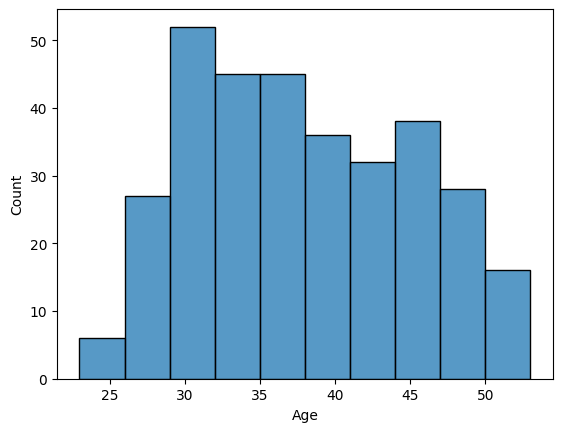

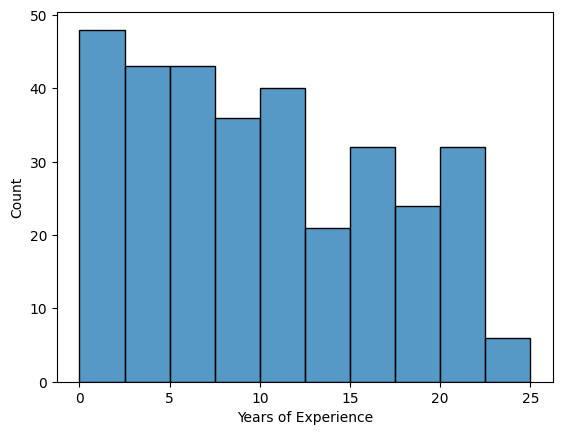

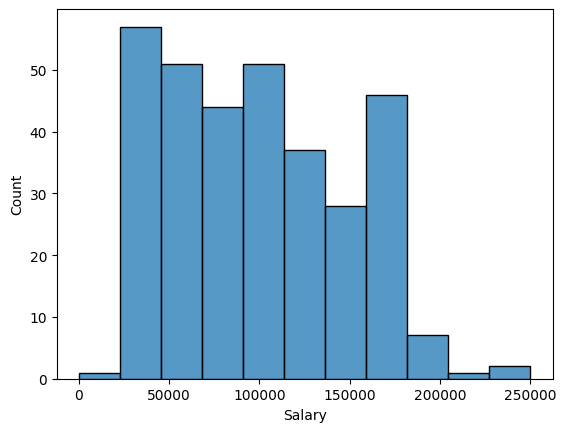

In [15]:
for i in data.columns:
    if data[i].dtypes!="object":
        sns.histplot(x=data[i])
        plt.show()

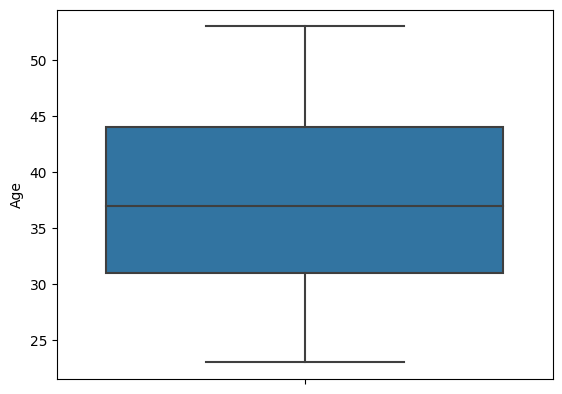

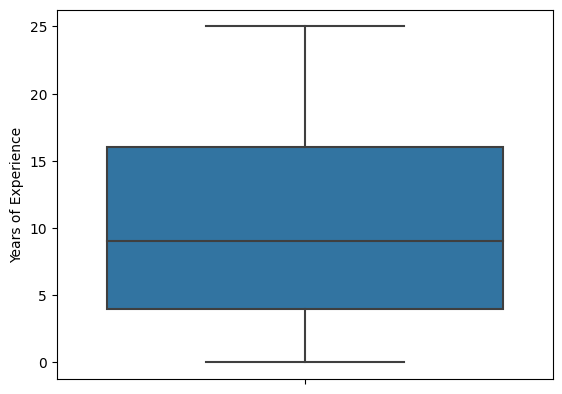

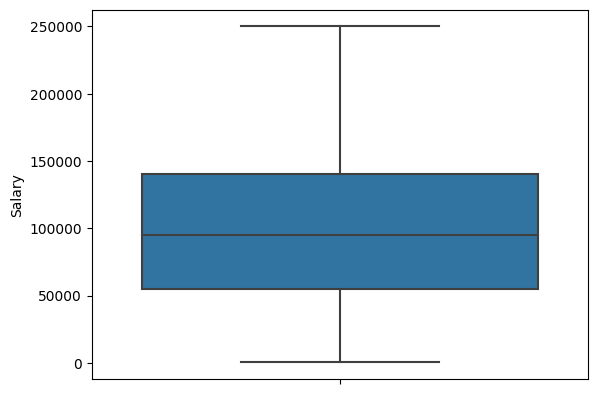

In [16]:
for i in data.columns:
    if data[i].dtypes!="object":
        sns.boxplot(y=data[i])
        plt.show()
    

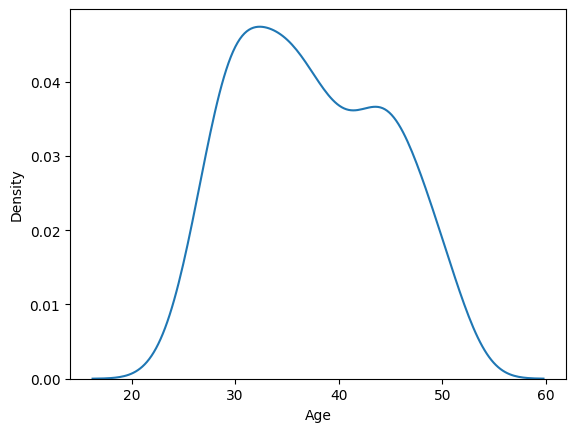

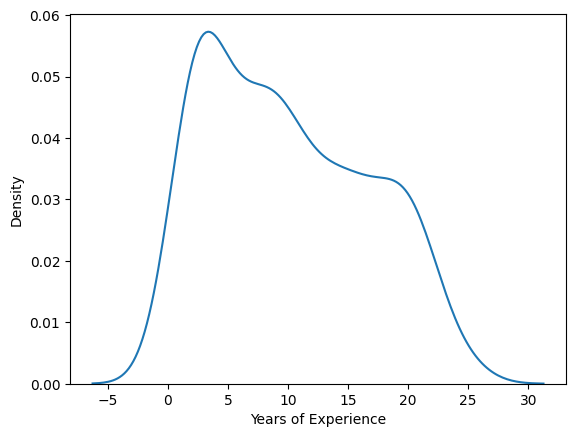

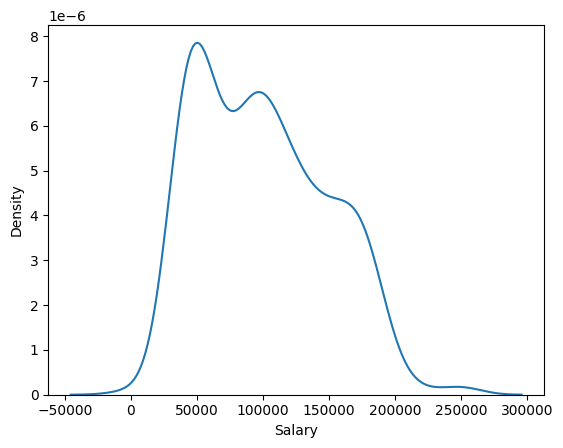

In [17]:
for i in data.columns:
    if data[i].dtypes!="object":
        sns.kdeplot(x=data[i])
        plt.show()

### RENAMING THE COLUMNS

In [18]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [19]:
data.rename(columns={"Education Level":"Education_Level",'Job Title':'Job_Title','Years of Experience':'Years_of-Experience'},inplace=True)

In [20]:
data.head()

,Age,Gender,Education_Level,Job_Title,Years_of-Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### MULTI VARIATE ANALYSIS

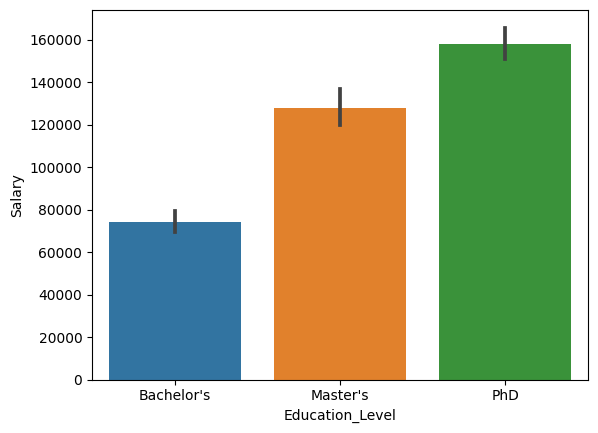

In [21]:
sns.barplot(x='Education_Level', y='Salary', data=data);

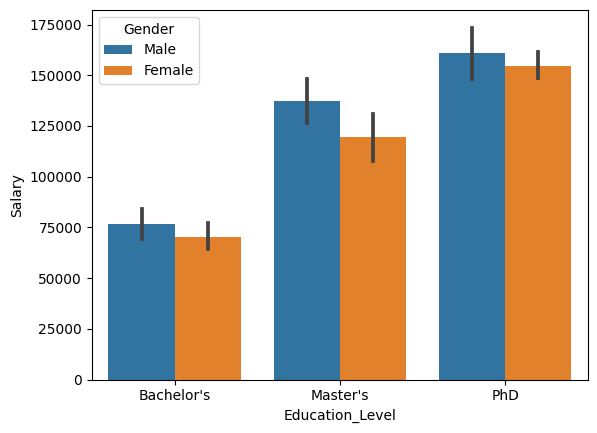

In [22]:
sns.barplot(x='Education_Level', y='Salary',hue='Gender', data=data);

<AxesSubplot: xlabel='Job_Title', ylabel='Years_of-Experience'>

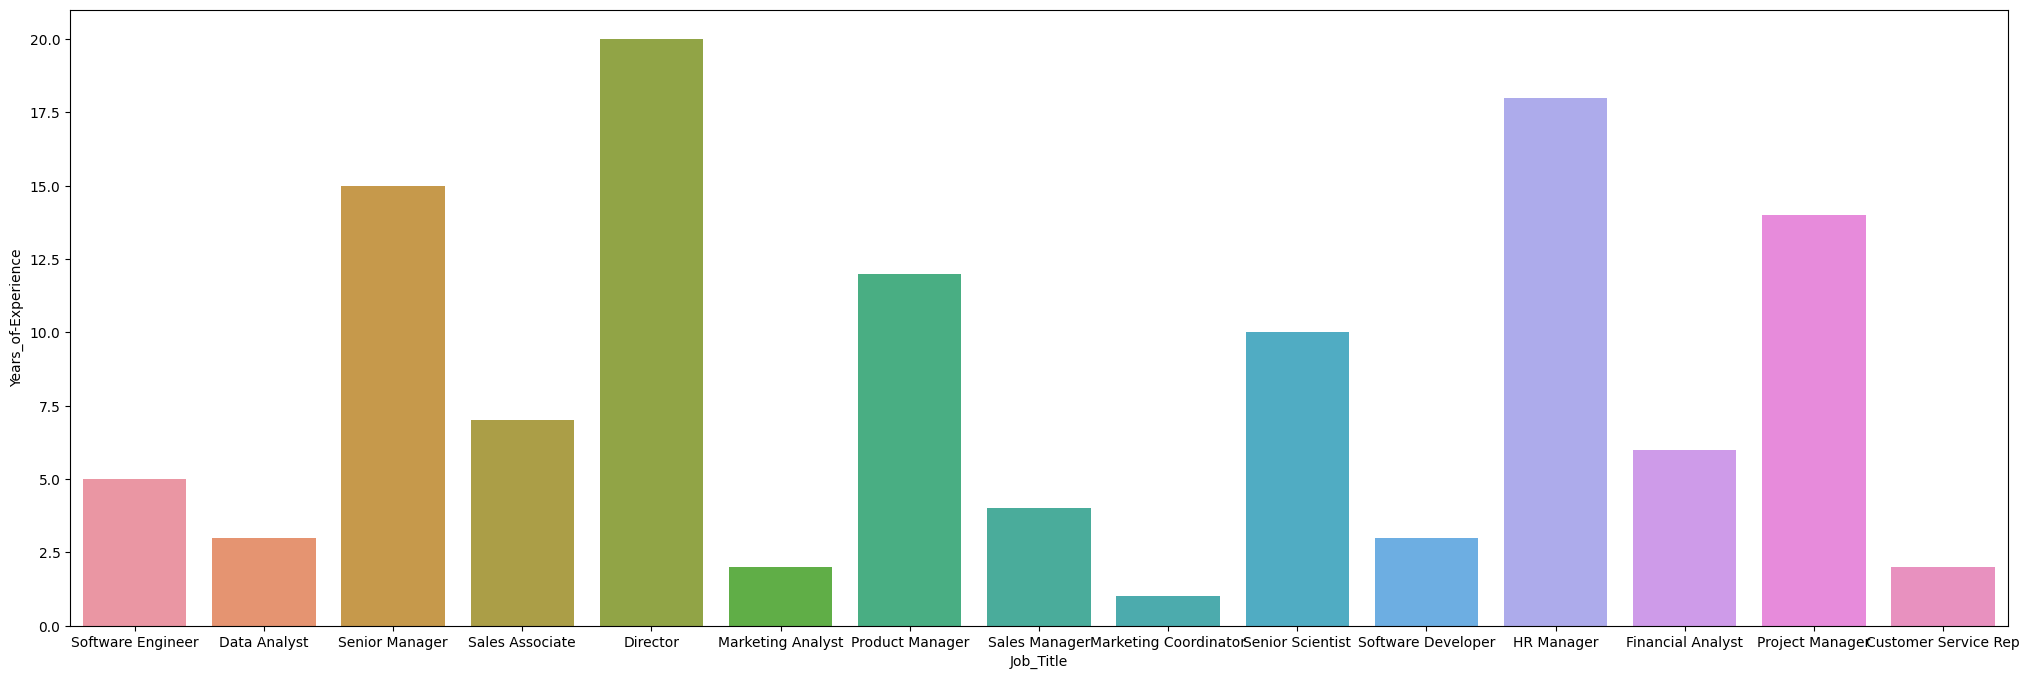

In [23]:
plt.figure(figsize=(25,8))
sns.barplot(x="Job_Title",y="Years_of-Experience",data=data[:15])


<AxesSubplot: xlabel='Education_Level', ylabel='Years_of-Experience'>

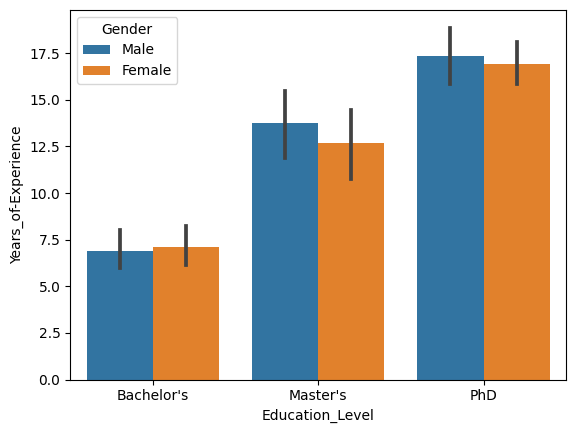

In [24]:
sns.barplot(x="Education_Level",y="Years_of-Experience",hue="Gender",data=data)

### pie plot

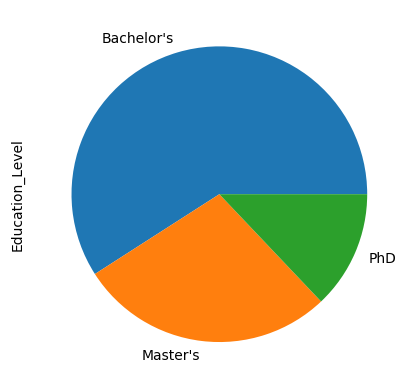

In [25]:
data.Education_Level.value_counts().plot.pie();

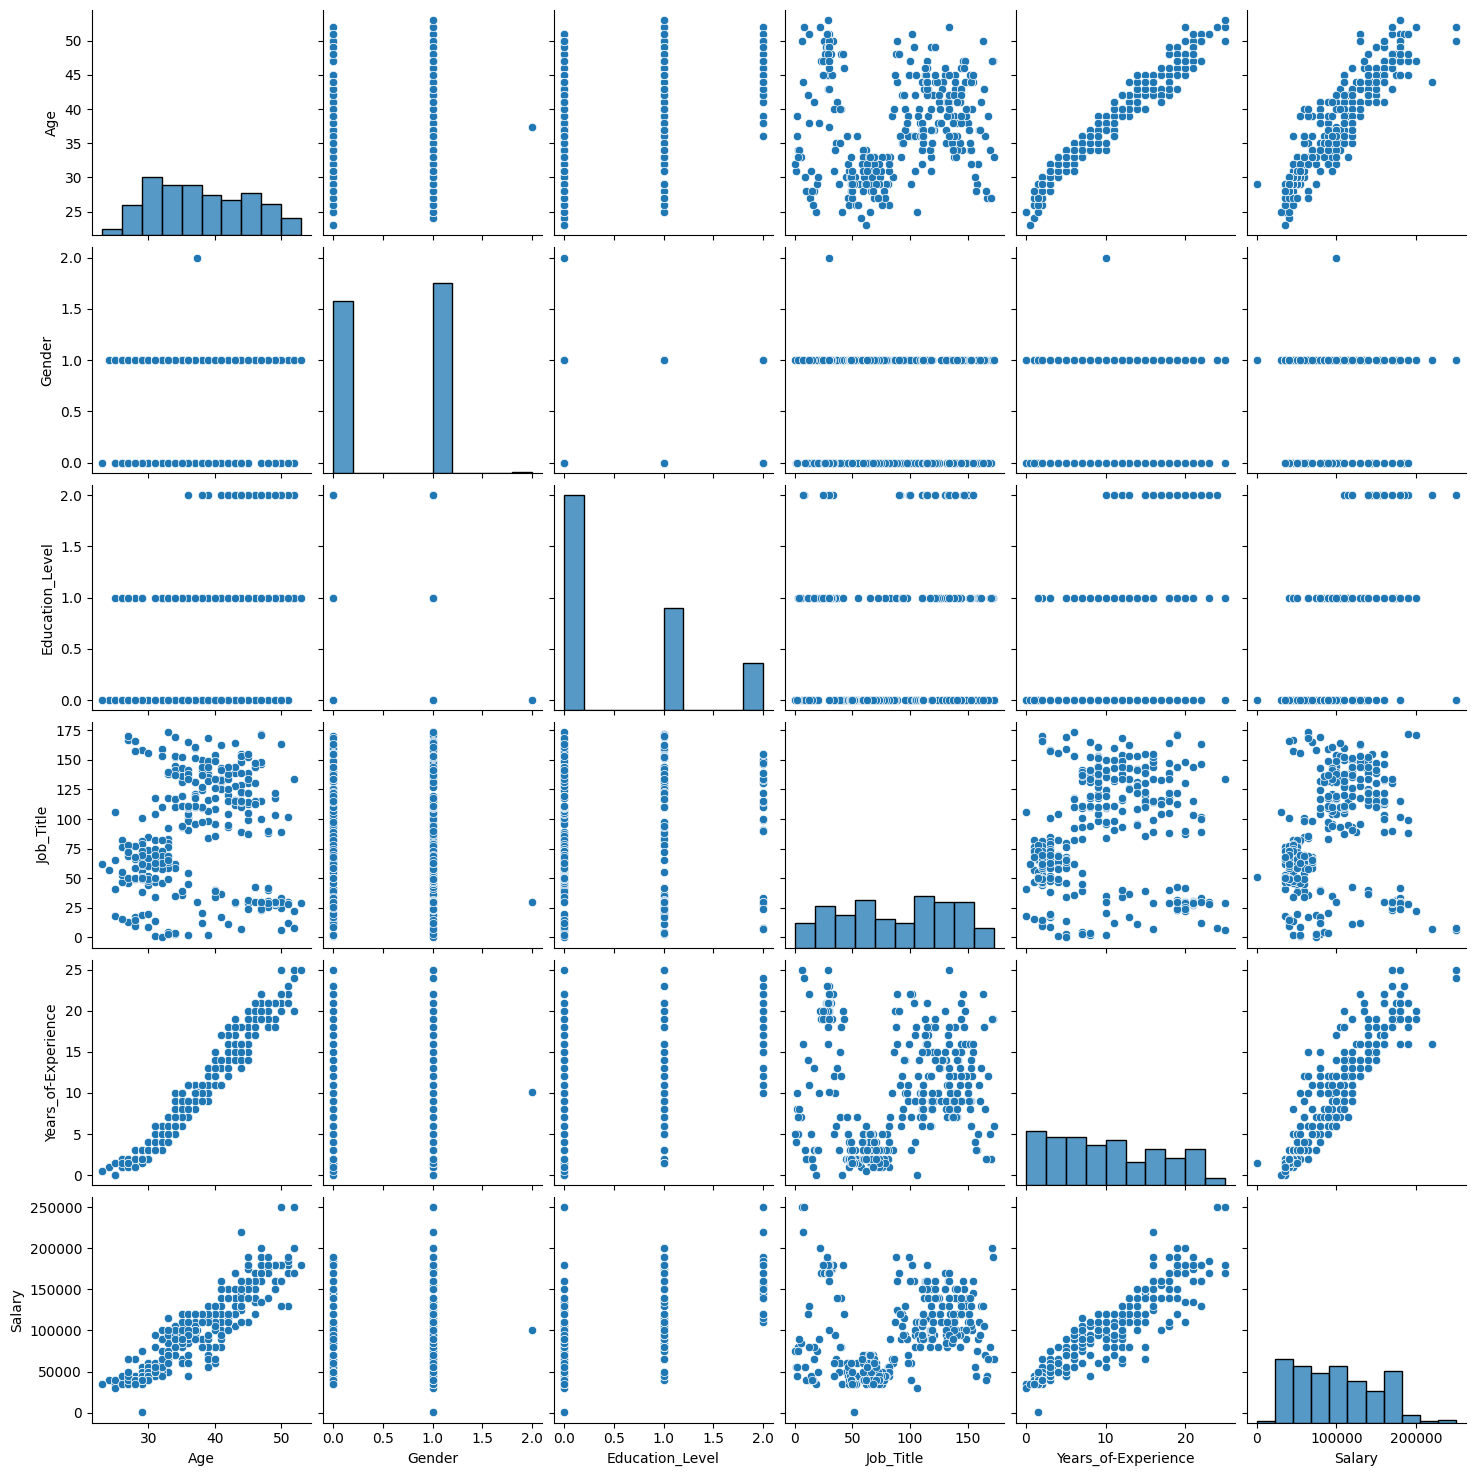

In [46]:
sns.pairplot(data=data)
plt.show()

### LABEL ENCODING THE COLUMNS

In [26]:
colos=["Gender","Education_Level","Job_Title"]
le=LabelEncoder()
data[colos]=data[colos].apply(le.fit_transform)

In [27]:
data.head()

,Age,Gender,Education_Level,Job_Title,Years_of-Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


### OUTLIER TREATMENT

In [29]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [30]:
for column in data.columns:
    if data[column].dtype!="object":
        UL,LL=outlier_limit(data[column])
        data[column]=np.where((data[column]>UL)|(data[column]<LL),np.nan,data[column])

In [31]:
data.dropna(inplace=True)

### CHECKING THE CORRELATION WITH THE TARGET

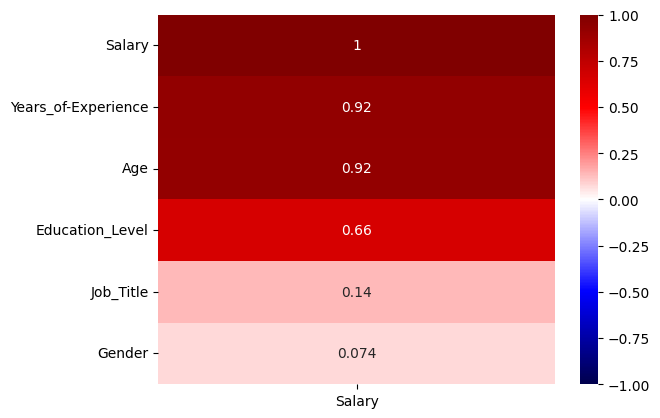

In [32]:
sns.heatmap(data.corr()[["Salary"]].sort_values(by="Salary",ascending=False),vmin=-1,vmax=1,annot=True,cmap="seismic");

In [33]:
x=data[["Years_of-Experience","Age","Education_Level"]].values
y=data[["Salary"]].values

### FUTURE SCALING

In [34]:
sc=StandardScaler()

In [35]:
X=sc.fit_transform(x)

### MODEL BUILDING

In [36]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(), 
    "GradientBoostingRegresso":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()

}

In [37]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  16630.411098454522
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  16620.001753102904
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  27845.642429235588
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  18807.59749626565
****************************************************************************************************
cross validation model : GradientBoostingRegresso
AVERAGE RMSE:  16357.265679499844
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  17429.46290922343
*********************************************

### selecting the GradientBoostingRegressor as it is having best metrics

In [38]:
model = GradientBoostingRegressor()

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [41]:
y_pred=model.predict(x)

In [42]:
OUTPUT = pd.DataFrame(zip(y,y_pred),columns=("ACTUAL",'PREDICTION'),dtype=float)

In [43]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,90000.0,64652.259053
1,65000.0,67192.625092
2,150000.0,150208.126688
3,60000.0,71108.087278
4,200000.0,198074.873720


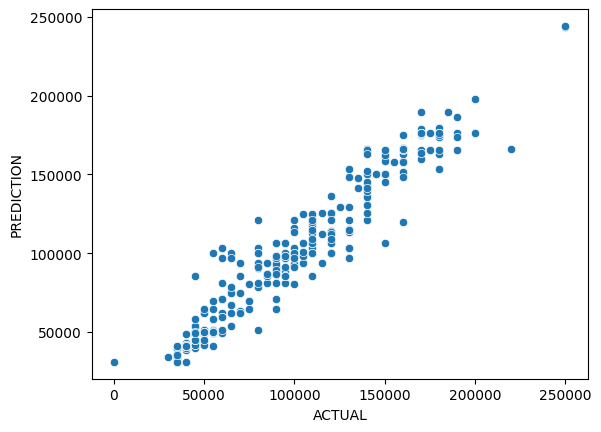

In [44]:
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTION");

In [45]:
model.score(x,y)

0.9337478709813078